In [38]:
## First step import all libraries needed for today Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import  svm , metrics
import seaborn as sns 
from sklearn import metrics,svm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
## Here we use the pandas library of Python to read a CSV file named "emails.csv" and store its contents as a pandas DataFrame object named "df".
df = pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
#This is the method in the pandas library of Python that displays a summary of a dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [4]:
#I'm getting rid off columns that will not be included in my work today.

df = df.drop(columns=['Email No.'])

In [5]:
## Split the data into independent and dependent variable: X , y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values



In [6]:
## Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 32)


In [7]:
#This code is training a machine learning model using logistic regression. 
#The logistic regression model is created using the LogisticRegression() function from the scikit-learn library in Python and is stored as an object named model_LR.
model_LR = LogisticRegression()

#Next line of code then fits the logistic regression model to the training data, which is represented by the feature variables in X_train and the corresponding target values in y_train.

model_LR.fit(X_train, y_train)


c:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
#The code is making predictions on the test data using the "predict" method of the "model_LR" object,
# and the predicted target values are stored in the "pred_LR" variable.

pred_LR = model_LR.predict(X_test)


#Code creates a Pandas DataFrame that displays the actual target values and the predicted target values side by side,
# with the actual values in a column labeled "Actual" and the predicted values in a column labeled "Predicted".
# We can evaluate the performance of the machine learning model on the test data. 
pd.DataFrame({'Actual': y_test, 'Predicted': pred_LR})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [9]:
## In this specific line of code, accuracy_score() is used to calculate the accuracy of a logistic regression model's
# predictions, which are stored in the pred_LR variable, on a test dataset. 
accuracy_LR = accuracy_score(y_test, pred_LR)

#Confusion_matrix() is used to compute the confusion matrix for our logistic regression model's predictions, which are stored in the pred_LR variable, on a test dataset.
conf_mat = confusion_matrix(y_test, pred_LR)


# Here we printing our results 
print(accuracy_LR)
print(conf_mat)


0.9623188405797102
[[698  18]
 [ 21 298]]


In [10]:
#This code is creating a machine learning model using Naive Bayes classification, specifically the Gaussian Naive Bayes algorithm.
model_NB = GaussianNB()

#This code will fit a machine learning model to a training dataset using the Naive Bayes algorithm, 
# specifically the Gaussian Naive Bayes variant.
model_NB.fit(X_train, y_train)


GaussianNB()

In [11]:
#This code makes predictions on a test dataset using the Naive Bayes model that was previously trained on a training dataset.
y_pred_NB = model_NB.predict(X_test)

#This code creates a Pandas DataFrame to display the actual and predicted class labels for the test dataset.
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})


,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [12]:
#This code calculates the accuracy of the Naive Bayes model on the test dataset, based on the predicted class labels and the true class labels for the test instances.
accuracy_NB = accuracy_score(y_test, y_pred_NB)

#This code creates the confusion matrix for the Naive Bayes model's predictions on the test dataset.
# y_test is a variable that contains the true class labels for the test instances, while y_pred_NB is a variable that contains the predicted class labels for the same instances, obtained from the model_NB.predict() method.
conf_mat_NB = confusion_matrix(y_test, y_pred_NB)

# This is where we check our results using print statement
print(accuracy_NB)
print(conf_mat_NB)

0.9458937198067633
[[676  40]
 [ 16 303]]


In [13]:
## K-Nearest Neighbors
#This  line of code creates a new instance of the KNeighborsClassifier class and sets the number of neighbors to 5.
#The KNeighborsClassifier is a classification algorithm that works by identifying the k nearest neighbors 
#to a given test instance in the training dataset, based on some distance metric.

Knn_model= KNeighborsClassifier(n_neighbors=5)


#This line of  code trains the K-Nearest Neighbors (KNN) classification model on the training dataset.
Knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [14]:
#This code uses the trained K-Nearest Neighbors (KNN) model to predict the class labels of the test instances.

y_pred_knn= Knn_model.predict(X_test)

#This code  will create a Pandas DataFrame that displays the actual class labels and predicted class labels of the test instances side by side.

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_knn})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [15]:
# Model Evaluation
#This code calculates the accuracy of the K-Nearest Neighbors (KNN) classification model on the test dataset.
accuracy_knn=accuracy_score(y_test, y_pred_knn)

#This code creates a confusion matrix for the K-Nearest Neighbors (KNN) classification model on the test dataset.
#It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) of the model.
conf_knn=confusion_matrix(y_test,y_pred_knn)
# Here we can see our results with print statement
print(accuracy_knn)
print(conf_knn)

0.8734299516908213
[[631  85]
 [ 46 273]]


In [16]:
#Decision Tree Classifier
#This line of code creates an instance of the DecisionTreeClassifier class from the sklearn.tree module.
#criterion='gini': This specifies the quality of the split to be measured using the Gini impurity criterion.
#random_state=100: This sets the random seed for the random number generator, ensuring that the same results will be produced each time the code is run.
#max_depth=3: This sets the maximum depth of the decision tree to 3. This means that the tree will have at most 3 levels of nodes, including the root node. 
#This helps to prevent overfitting by limiting the complexity of the tree.
#min_samples_leaf=5: This sets the minimum number of samples required to be at a leaf node. 
#If a split would result in a leaf node with fewer samples than this parameter, the split is not performed. 
#This also helps to prevent overfitting by avoiding creating nodes with too few samples.
#Together, these parameters help to control the complexity of the decision tree 
#and prevent overfitting, while still allowing it to accurately classify new data.
Decision_tree_gini=DecisionTreeClassifier(criterion='gini', random_state=100,max_depth=3,min_samples_leaf=5) 
#This line of code creates an instance of the DecisionTreeClassifier class from the sklearn.tree module like the line of code before but got critical difference in criterion.
#criterion='entropy': This specifies the quality of the split to be measured using the information gain criterion based on entropy.
# Entropy is a measure of impurity, where lower values indicate a more homogeneous(i.e. all of the samples belong to the same class).
Decision_tree_entropy= DecisionTreeClassifier(criterion='entropy', random_state=100,max_depth=3,min_samples_leaf=5)
#max_depth=5: This sets the maximum depth of the decision tree to 5. This means that the tree will have at most 5 levels of nodes, including the root node.
#The depth of the tree is a measure of its complexity, and a deeper tree can capture more complex patterns in the data, but may also be more prone to overfitting.
#By setting the max_depth to 5, the tree is restricted to a relatively simple structure with a limited number of levels.
Decision_tree_max_depth= DecisionTreeClassifier(max_depth=5)

In [17]:
#Train models  based on Decision Tree Classifier
#This line of code fits the decision tree model, created using the DecisionTreeClassifier function with the 'gini' criterion
# and other specified parameters, to the training data X_train and corresponding target labels y_train.
#The .fit() method is a built-in function of the DecisionTreeClassifier class, which takes the training data and labels as input,
#and trains the model by recursively partitioning the input space into regions that correspond to different target classes.
Decision_tree_gini.fit(X_train,y_train)
#This line of code fits the decision tree model, created using the DecisionTreeClassifier function with the 'entropy' criterion 
# and other specified parameters, to the training data X_train and corresponding target labels y_train. We taking same steps like before with gini criterion.
Decision_tree_entropy.fit(X_train,y_train)
#This line of code fits the decision tree model, created using the DecisionTreeClassifier function with the max_depth=5 parameter, to the training data X_train and corresponding target labels y_train.
Decision_tree_max_depth.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=5)

In [18]:
#This line of code uses the predict() method of the DecisionTreeClassifier object Decision_tree_gini to generate predictions for the test data X_test. 
#The predicted labels are stored in the variable y_pred_gini.
#The predict() method takes the test data as input and returns the predicted class labels for each observation in the input data. 
#The decision tree model that was fitted to the training data using the fit() method has learned a set of rules that allow it to classify new, unseen data into one of the target classes.
y_pred_gini = Decision_tree_gini.predict(X_test)
#In this case, the Decision_tree_entropy object was created using the 'entropy' splitting criterion, which uses information gain to select the best feature to split on at each node of the tree. 
y_pred_entropy = Decision_tree_entropy.predict(X_test)
#In this case, the Decision_tree_max_depth object was created with a maximum depth of 5, which means that the decision tree will stop splitting nodes and creating new branches once it reaches a depth of 5 levels.
y_pred_depth = Decision_tree_max_depth.predict(X_test)



In [19]:
#This line of code creates a Pandas DataFrame object with two columns: "Actual" and "Predicted". 
#The "Actual" column contains the true class labels for the test data, which are stored in the variable y_test. 
#The "Predicted" column contains the predicted class labels for the test data, which are stored in the variable y_pred_gini.



pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gini})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [20]:
#This line of code creates a Pandas DataFrame object with two columns: "Actual" and "Predicted". 
#The "Actual" column contains the true class labels for the test data, which are stored in the variable y_test. 
#The "Predicted" column contains the predicted class labels for the test data, which are stored in the variable y_pred_entropy.


pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_entropy})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,1
1032,1,1
1033,0,0


In [21]:
#This line of code creates a Pandas DataFrame object with two columns: "Actual" and "Predicted". 
#The "Actual" column contains the true class labels for the test data, which are stored in the variable y_test. 
#The "Predicted" column contains the predicted class labels for the test data, which are stored in the variable y_pred_depth.

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_depth})

,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


In [22]:
#Model evaluation gini.
#The accuracy_score() function from the Scikit-learn library is used to calculate the accuracy score.
# It takes two arguments: the true class labels for the test data y_test, and the predicted class labels generated by the model y_pred_gini.

accuracy_gini=accuracy_score(y_test, y_pred_gini)

#The conf_gini variable stores the computed confusion matrix, which is a 2x2 table with four elements that represent the number of true positives, false positives, true negatives, and false negatives.
#The rows of the matrix correspond to the true class labels, and the columns correspond to the predicted class labels.
conf_gini=confusion_matrix(y_test,y_pred_gini)


#This  is where we use print to see our results 
print(accuracy_gini)
print(conf_gini)


0.8347826086956521
[[690  26]
 [145 174]]


In [23]:
#Evaluate entropy model.
#The accuracy_score() function from the Scikit-learn library is used to calculate the accuracy score.
# It takes two arguments: the true class labels for the test data y_test, and the predicted class labels generated by the model y_pred_entropy.

accuracy_entropy=accuracy_score(y_test, y_pred_entropy)
##The conf_entropy variable stores the computed confusion matrix, which is a 2x2 table with four elements that represent the number of true positives, false positives, true negatives, and false negatives.
#The rows of the matrix correspond to the true class labels, and the columns correspond to the predicted class labels.


conf_entropy=confusion_matrix(y_test,y_pred_entropy)
#This is where We use print to see our results.
print(accuracy_entropy)
print(conf_entropy)


0.7855072463768116
[[497 219]
 [  3 316]]


In [24]:
#Evaluate model max_depth.

#This line of code calculates the accuracy score of the predicted labels generated by the Decision_tree_max_depth model for the test data X_test.
#The accuracy_score() function from the Scikit-learn library is used to calculate the accuracy score.
#It takes two arguments: the true class labels for the test data y_test, and the predicted class labels generated by the model y_pred_depth.
accuracy_max_depth=accuracy_score(y_test, y_pred_depth)

#This line of code generates a confusion matrix for the predicted labels generated by the Decision_tree_max_depth model for the test data X_test. 
conf_max_depth=confusion_matrix(y_test,y_pred_depth)


#This is where we print our results
print(accuracy_max_depth)
print(conf_max_depth)


0.8405797101449275
[[700  16]
 [149 170]]


In [25]:
#Support vector machine

#The line of code creates an instance of the SVC (Support Vector Classification) class from the Scikit-learn library and sets the kernel parameter to 'linear'.
#The 'linear' kernel is a good choice when the data is linearly separable, that is, when the classes can be separated by a straight line or a hyperplane.
clfLinear = svm.SVC(kernel='linear') 
#This line of code creates an instance of the SVC (Support Vector Classification) class from the Scikit-learn library and sets the kernel parameter to 'sigmoid'.
#The sigmoid kernel is a non-linear kernel function, and it is generally used for binary classification problems. 
# It can work well when the classes are not linearly separable, and it can capture complex relationships between the input features and the output labels. 
clfsig = svm.SVC(kernel='sigmoid') 
#This line of code creates an instance of the SVC (Support Vector Classification) class from the Scikit-learn library and sets the kernel parameter to 'rbf'(Radial Basis Function)
#The RBF kernel is a popular kernel function for SVM, and it can capture complex non-linear relationships between the input features and the output labels.
# It can work well for a wide range of datasets and is less prone to overfitting than some other kernel functions.

clfrbf = svm.SVC(kernel='rbf') 

In [26]:
#This line of code trains a SVM classification model using the linear kernel on the training data (X_train and y_train).
#Specifically, it creates an instance of the SVC class with the linear kernel (specified by kernel='linear'), and then calls the fit method of the class to fit the model to the training data.

clfLinear.fit(X_train, y_train)
#This line of code trains a SVM classification model using the sigmoid kernel on the training data (X_train and y_train).
#Specifically, it creates an instance of the SVC class with the sigmoid kernel (specified by kernel='sigmoid'), and then calls the fit method of the class to fit the model to the training data.
#The sigmoid kernel is a non-linear kernel function that maps the data to a high-dimensional space, and computes the dot product of the mapped data to obtain the similarity between two points.
clfsig.fit(X_train, y_train)

clfrbf.fit(X_train, y_train)

SVC()

In [27]:
#This line of code is used to make predictions using a trained linear classification model.
y_pred = clfLinear.predict(X_test)
# This line of code is used to make predictions on the test set. The predict() method of the SVC object clfsig is called with the test set data X_test as the input.
#  The method returns a predicted label for each input data point, which are assigned to the variable y_pred_sig
y_pred_sig = clfsig.predict(X_test)
#This line of code is used to make predictions using a trained support vector machine (SVM) model with a radial basis function (RBF) kernel.
y_pred_rbf = clfrbf.predict(X_test)

In [28]:
#These lines of code use scikit-learn's accuracy_score function from the metrics module to calculate
# the accuracy of the predictions made by three different classifiers on a test set of data.
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sig))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.9449275362318841
Accuracy: 0.6231884057971014
Accuracy: 0.7961352657004831


In [29]:
#This line of code creates a Pandas DataFrame that contains two columns, 'Actual' and 'Predicted'.
# The 'Actual' column contains the true labels of the test set, y_test,
# and the 'Predicted' column contains the predicted labels of the test set, y_pred.

pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
1030,1,1
1031,0,0
1032,1,1
1033,0,0


<AxesSubplot: >

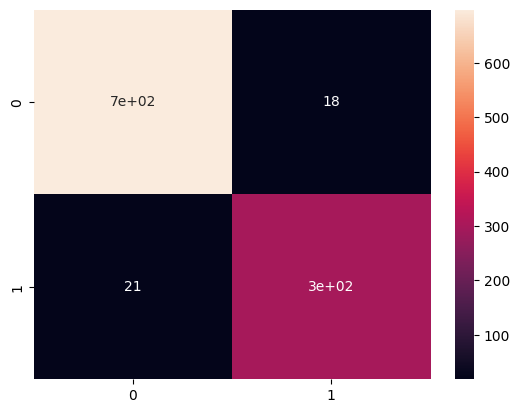

In [56]:
sns.heatmap(conf_mat, annot=True)

In [53]:
# Working on logic regres pred_LR

print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       716
           1       0.94      0.93      0.94       319

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.96      1035
weighted avg       0.96      0.96      0.96      1035



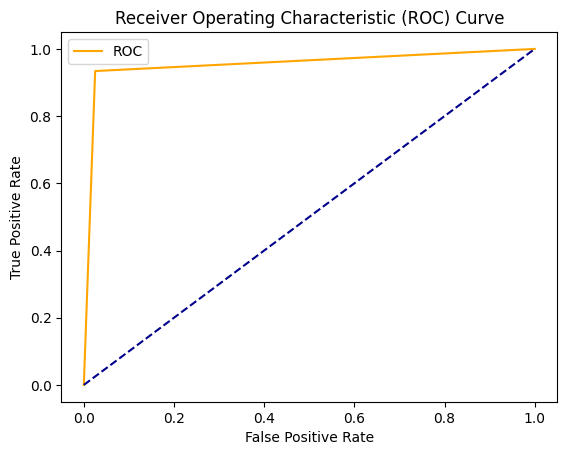

In [51]:
#pred_LR is logic in our example

fpr, tpr = roc_curve(y_test, pred_LR)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [52]:
#this is example for logic reg , should range from 0 to 1 . Closer to 1 the better , more precise.

auc = roc_auc_score(y_test, pred_LR)
print('AUC: %f' %auc)

AUC: 0.954515


In [48]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       716
           1       0.88      0.95      0.92       319

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [47]:
auc = roc_auc_score(y_test, y_pred_NB)
print('AUC: %f' %auc)

AUC: 0.946989


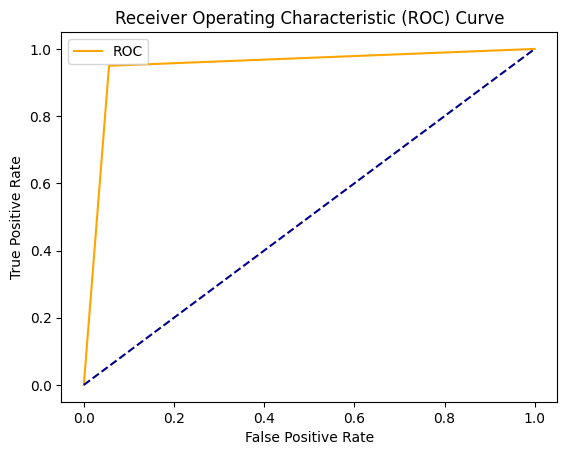

In [49]:
fpr, tpr = roc_curve(y_test, y_pred_NB)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [44]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       716
           1       0.86      0.40      0.55       319

    accuracy                           0.80      1035
   macro avg       0.82      0.69      0.71      1035
weighted avg       0.81      0.80      0.77      1035



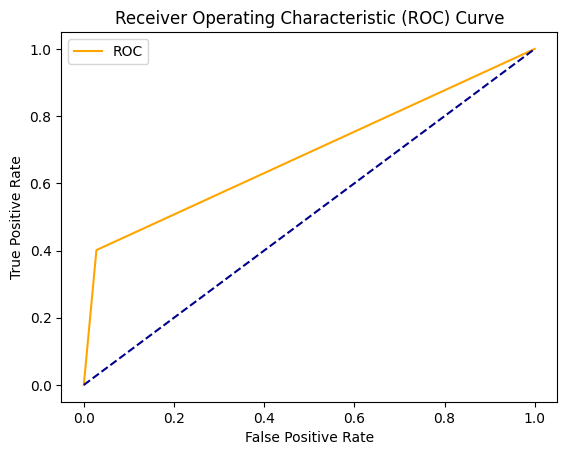

In [46]:
fpr, tpr = roc_curve(y_test, y_pred_rbf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [54]:
auc = roc_auc_score(y_test, y_pred_rbf)
print('AUC: %f' %auc)

AUC: 0.686660
